<a href="https://colab.research.google.com/github/skojaku/core-periphery-detection/blob/master/examples/How_to_use_cpnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use `cpnet`

We will walk through how to use `cpnet` in stages. Specifically, we will cover the following topics.
- Setting up the environment
- Detecting discrete core-periphery structure
- Detecting continuous core-periphery structure 
- Measuring the statistical significance
- Caveat of one-core-one-periphery structure

## Set up
Let us install  `cpnet` package:

In [1]:
%%capture
!pip install cpnet


Additionally, we need the following packages:
- `networkx`
- `numpy`
- `matplotlib`

In [2]:
%%capture
!pip install networkx numpy matplotlib==3.5.2 # Install the packages

And import the packages

In [3]:
import cpnet
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Detecting discrete core-periphery structure

As a toy example, we use the karate club network, which can be loaded using the `networkx` package. 

In [4]:
G = nx.karate_club_graph()

Now, let us detect a core-periphery structure in the network. `cpnet` offers several algorithms for detecting core-periphery structure. Here, we use a widely-used algorithm, Borgatti-Everett (BE) algorithm.

With `cpnet`, you can run the algorithm in two steps, namely creating an instance of the algorithm and feeding the network to it:

In [5]:
alg = cpnet.BE() # Load the Borgatti-Everett algorithm
alg.detect(G) # Feed the network as an input

The algorithm will then find the core-periphery structure, which can be accessed as follows:

In [6]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

Both `x` and `c` are python `dict` objects, with keys corresponding to the IDs of nodes (which we can see by `G.nodes()`).

`x[i]` indicates the *coreness* ranging between [0,1], with a larger value indicating a stronger affiliation to the core. For example, the detected `x` looks like

In [7]:
print(x)

{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 1}


where `x[i]=1` or `x[i]=0` means that node `i` belongs to a core or a periphery, respectively. With the BE algorithm, no node takes a fractional value (e.g., `x[i]=0.5`) because the BE algorithm detects a *discrete* core-periphery structure, a structure consisting of core and peripheral nodes without the ones with intermediate roles. 

The other `dict` object, `c`, indicates the group to which the node `i` belongs, which we will explain later on.


`cpnet` offers a simple function to visualize the detected core-periphery structure:  

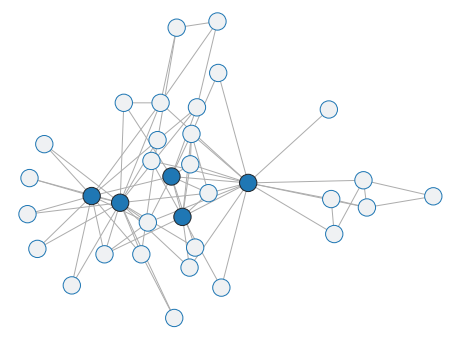

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

where the filled and open circles indicate the detected core and periphery, respectively. 

# Continuous core-periphery structure

So far, we focus on *discrete* core-peripehry structure that consists of nodes with two roles, core and periphery. One may introduce an additional role, *intermediary*, that has the characteristics of both core and periphery. Along this line of argument, one can think of a *continuous* core-periphery structure, in which each node can have different level of *coreness* by ralaxing the binary constraint on $x[i] \in \{0,1\}$ with $x[i] \in [0,1]$. 

`cpnet` implements some of the algorithms to detect continuous core-periphery structure. Here, we use the `MINRES` algorithm for demonstration. 

In [9]:
alg = cpnet.MINRES()
alg.detect(G)
x = alg.get_coreness() 
c = alg.get_pair_id()

We note that the coreness value varies between 0 and 1. 

In [10]:
print(x)

{0: 0.7088179619237369, 1: 0.4956619622459862, 2: 0.5175442093722369, 3: 0.3307898266804213, 4: 0.3788534684826272, 5: 0.23461988400315953, 6: 0.22605414032013063, 7: 0.5482508704253668, 8: 0.41050655929846597, 9: 0.4771624191242492, 10: 0.5001584125119105, 11: 0.07418709976821383, 12: 0.0916570307881115, 13: 0.6878242980922954, 14: 0.5715113743603515, 15: 0.3518526040718844, 16: 0.4698658228992509, 17: 0.6279290550178109, 18: 0.37790154313315544, 19: 0.19127870478726877, 20: 0.5680415811617183, 21: 0.21111823013060432, 22: 0.5858156223381195, 23: 0.26474295709502466, 24: 0.4241443725955638, 25: 0.6804261396162116, 26: 0.0831818398666367, 27: 0.20626663677388585, 28: 0.6477521392691221, 29: 0.23191433194965716, 30: 0.6630875350688583, 31: 0.35123875109415786, 32: 0.6618519491376952, 33: 1.004163907600284}


The continuous core-periphery structure can be visualized in the same way as we do for the discrete one, i.e., 

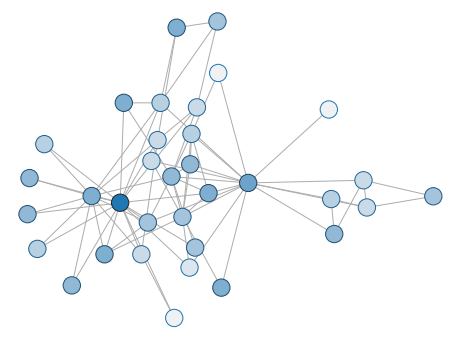

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax, pos = pos)

where the darkness of the circles indicates the coreness of the node. 

# Multiple core-periphery pairs

Networks may have multiple cores and peripheries. In fact, there is no reason to restrict ourselves to the one-core-one-periphery structure. As it turns out, introducing multiple cores and peripheries are key to identify statistically significant core-periphery structure, with the random networks having the identifical degree distribution. 

Here, we use the `KM_config` algorithm:

In [12]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G)

Let us retrive the detected core-periphery structure by:

In [13]:
c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()

Here `c` comes to be an important variable. `c` is a python dict object with value `c[i]` indicating the membership of node $i$.

In [14]:
print(c)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 3, 9: 3, 10: 1, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 1, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 3, 24: 2, 25: 2, 26: 3, 27: 3, 28: 2, 29: 3, 30: 3, 31: 2, 32: 3, 33: 3}


We can visualize the results in the same way as for the BE and MINRES algorithms:

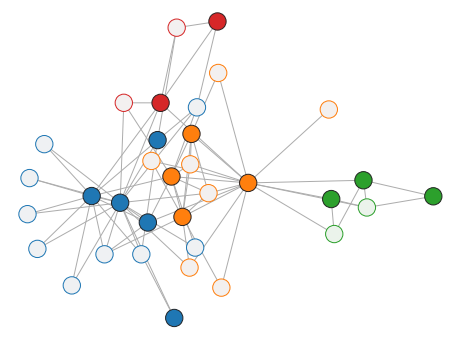

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G, c, x, ax, pos=pos)

The color of nodes indicate the membership of nodes. 

# Statistical significance test

The algorithm detects something even if the network does not have non-trivial structure. Therefore, it is critical to assess the *significance* of the detected structure. 

We will use a generic statistical test, `q-s test`, to assess the statistical significance of core-periphery structure. See [the paper](https://www.nature.com/articles/s41598-018-25560-z) for details. 


The `q-s test` is implemented in `cpnet` and can be used as follows:

In [16]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=1
)

100%|██████████| 300/300 [00:07<00:00, 41.89it/s]


`cpnet.qstest` takes the following inputs:
- `c` and `x` are the core-periphery structure for which to compute the statistical significance
- `kmconfig` is the algorithm used to detect the core-periphery structure
- `significance_level` specifies the statistical significance level 
- `num_of_thread` specifies the number of threads.
and provides the following outputs:
- `sig_c` and `sig_x` are the *significant* core-periphery structures. Nodes that belong to insignificant structure is labeled as `None`.
- `significant` is a list with element $significant[k]=True$ or $significant[k]=False$ indicating significant or insignificant core-periphery pair, respectively. 
- `p_values` is a list with element indicating the p-value of the detected core-periphery structures. 

Now let us draw the significant core-periphery structures:


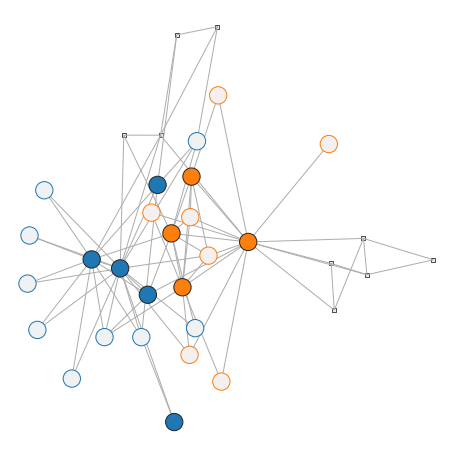

In [17]:
# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

Some nodes are marked as small rectangles. These nodes are the ones that belong to *insignificant* core-periphery structure. Two core-peripehry pairs passed the statistical test, and others are deemed as insignificant structure, i.e., trivial structures that are likely to appear in random networks.

# Caveat of one-core-one-periphery structure

One may argue that core is a hub that holds a large number of edges in the network. While counter examples, where hubs are not core nodes, are possible, at practical level, many algorithms detect hubs as core. If hubs are core nodes, why do we need to bring complex concept like core-periphery structure, instead of analyzing degree, a much simpler and intuitive statistics? 

In [our paper](https://iopscience.iop.org/article/10.1088/1367-2630/aab547), we argue that degree is the determinant of core-periphery structure, if we are concerned with the one-core-one-periphery structure. 

To demonstrate the role of degree, let us prepare two networks, namaly the karate club network and its random network, where we randomly rewire the edges while preserving the degree. 

In [18]:
Grand = nx.configuration_model([d[1] for d in G.degree()])

Then, we apply the BE algorithm to the two networks and compare, side-by-side, the detected core-periphery structures:

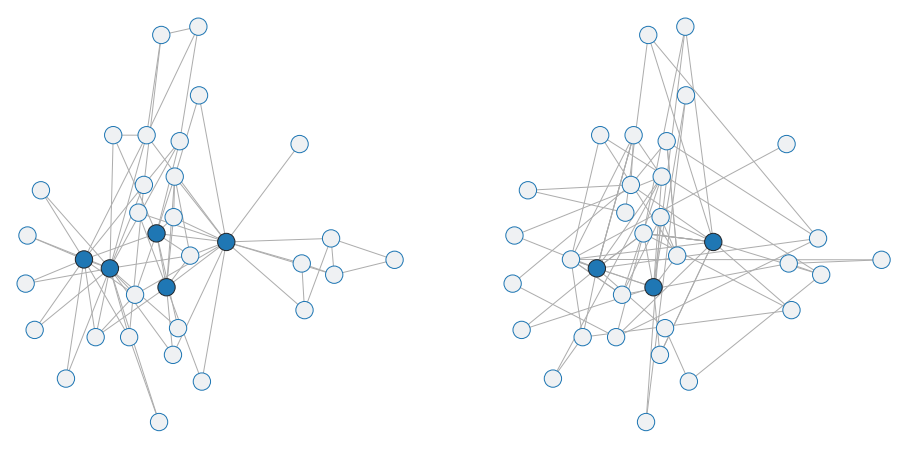

In [19]:
# Detect core-periphery structure in the original karate club network
BE = cpnet.BE()
BE.detect(G)
c = BE.get_pair_id()
x = BE.get_coreness()

# Detect core-periphery structure in the randomized karate club network
BE.detect(Grand)
c_rand = BE.get_pair_id()
x_rand = BE.get_coreness()

# Visualization
fig, axes = plt.subplots(figsize=(16, 8), ncols = 2)
ax, pos = cpnet.draw(G, c, x, axes[0], pos=pos)
ax, pos = cpnet.draw(Grand, c_rand, x_rand, axes[1], pos=pos)

The BE algorithm detected a similar set of core nodes, even if we *randomly* rewire the edges in the network. Only information preserved is the degree, suggesting that degree is a strong determinant of core-periphery structure. 

In fact, the core-periphery structure does not pass the statistical test (up to type I error), i.e., 

100%|██████████| 300/300 [00:02<00:00, 115.16it/s]


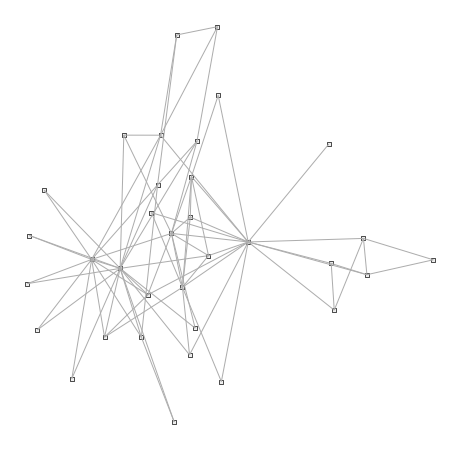

In [20]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, BE, significance_level=0.01, num_of_thread=1
)

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

This means that the BE algorithm does not detect *significant* core-periphery structure in the network, when compared against random networks with the identifical degree distribution. The same argument applies to other algorithms for detecting one core and one periphery, such as the Lip algorithm. 

Why is one-core-one-periphery structure insignificant? It's because we fix the degree when rewiring edges. A core node needs to be *densely* connected with other core nodes and peripheral nodes. This `densely` means that there are more edges than expected by random. Now, if a core node has a larger number of edges by random, the node always has a fewer number of edges to the peripheral noeds by random, because we fix the degree, i.e., total number of edges emanating from the node. Accordingly, a node cannot be densely connected to the other core and peripheral nodes at the same time. 

Introducing multiplicity in core and periphery enables core-periphery structure to be significant relative to the random networks with the same degree distribution. Other modelling is also possible. See [our paper](https://iopscience.iop.org/article/10.1088/1367-2630/aab547) for details. 

Note that when using other random network models, such as the Erdos-Renyi random graph, one-core-one-periphery structure can be significant. An example is the `Surprise` algorithm and [its variant](https://github.com/EmilianoMarchese/SurpriseMeMore). Nevertheless, hub nodes are very likely to be detected as core nodes if the Erdos-Renyi random graph is used for assessing statistical significance. 
